In [0]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [23]:
# raw 데이터 확인
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [24]:
train_labels[0]

1

In [25]:
# 인덱스 개수 체크하기
max([max(sequence) for sequence in train_data])

9999

In [0]:
# 리뷰 데이터 하나를 원래의 영어 단어로 한번 바꾸어 보자.

# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집는다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩한다
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺀다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [27]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 데이터 준비하기
신경망에 숫자 리스트를 주입할 수는 없다. 리스트를 텐서로 바꾸는 두가지 방법이 있다.
- 같은 길이가 되도록 리스트에 패딩을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환한다. 그다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫번째 층으로 사용한다. (embedding 층을 말하며 나중에 자세히!)
- 리스트를 one-hot encoding 하여 0과 1의 벡터로 변환한다. 예를 들면 시퀀스 [3, 5] 를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환한다. 그다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense층을 신경망의 첫번째 층으로 사용한다.


여기서는 두번째 방식을 사용하고 이해를 돕기 위해 직접 데이터를 one hot encoding 벡터로 만들어보자.

In [0]:
# 벡터화 함수 만들기

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만든다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만든다
    return results

# 훈련 데이터를 벡터로 변환한다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환한다
x_test = vectorize_sequences(test_data)

In [29]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
# 레이블을 벡터로 바꾼다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 신경망 모델 만들기
입력 데이터가 벡터이고 레이블은 스칼리앋. 아마 앞으로 볼 수 있는 문제 중 가장 간단한 문제에 잘 작동하는 네트워크 종류는 relu 활성화 함수를 사용한 완전 연결층(Dense(16, activation='relu')을 그냥 쌓는 것이다.

### output = relu(dot(W, input) + b)

In [0]:
# 모델 만들기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 훈련 검증
훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해서는 원본 훈련 데이터에서 10,000 의 샘플을 떼어서 검증 셋을 만들어야 한다.

In [0]:
# 훈련 검증
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [37]:
# 모델 학습
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.4991 - acc: 0.7901 - val_loss: 0.3717 - val_acc: 0.8746
Epoch 2/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.2995 - acc: 0.8997 - val_loss: 0.2992 - val_acc: 0.8924
Epoch 3/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.2195 - acc: 0.9270 - val_loss: 0.2899 - val_acc: 0.8829
Epoch 4/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.1738 - acc: 0.9431 - val_loss: 0.2749 - val_acc: 0.8898
Epoch 5/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.1420 - acc: 0.9551 - val_loss: 0.2805 - val_acc: 0.8876
Epoch 6/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.1159 - acc: 0.9641 - val_loss: 0.3197 - val_acc: 0.8758
Epoch 7/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.0995 - acc: 0.9695 - val_loss: 0.3096 - 

In [38]:
# 훈련과 검증 도중 모니터링 할 측정 지표 4개 항목을 딕셔너리로 만들기
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

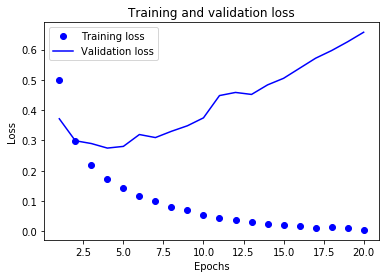

In [39]:
# loss 값 시각화
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

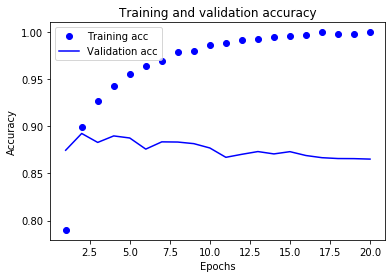

In [40]:
# validation 값 시각화

plt.clf()   # 그래프를 초기화합니다

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [41]:
# 처음부터 다시 새로운 신경망을 4번의 에포크 동안만 훈련하고 테스트 데이터에서 평가
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 121us/step - loss: 0.4495 - acc: 0.8258
Epoch 2/4
25000/25000 [==============================] - 3s 109us/step - loss: 0.2608 - acc: 0.9073
Epoch 3/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.2011 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 2s 78us/step


In [42]:
results

[0.3021811978626251, 0.8816]

In [43]:
# 훈련 모델로 새로운 데이터를 예측하기
model.predict(x_test)


array([[0.23423767],
       [0.9999406 ],
       [0.95785856],
       ...,
       [0.15963799],
       [0.10060716],
       [0.67558724]], dtype=float32)